In [14]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
#BC_data = pd.read_csv('Wisconsin_diagnostic_breast_cancer_data_set.csv')

df = pd.read_csv('UCI data set.txt')
df

,id,par1,par2,par3,par4,par5,par6,par7,par8,par9,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [16]:
df.replace('?', -9999, inplace = True)
df.drop(['id'], 1, inplace=True)

In [20]:
x = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0 )


In [22]:
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit (x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
print (clf.score(x_train, y_train))
print (clf.score(x_test, y_test))

1.0
0.9714285714285714


In [26]:
data = np.array([4,3,3,2,1,2,1,1,2])

In [27]:
prediction = clf.predict(data.reshape(1,-1))
print(prediction)

[2]


### Read Data from your disk and make predictions using the KNN Classifier

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0 )


In [30]:
training_accuracy = [] 
test_accuracy = []
#try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

In [32]:
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))

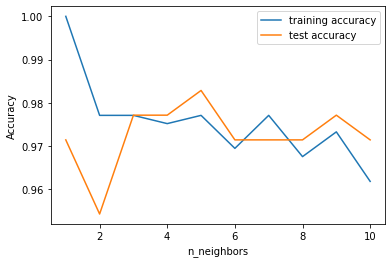

In [34]:
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### c) Do it again, now with breast cancer data loaded from sklearn

In [35]:
from sklearn.datasets import load_breast_cancer

In [36]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(
     cancer.data, cancer.target, stratify = cancer.target, random_state = 66)